# Modelos individuais

* Modelos onde cada indivíduo é tratado como uma variável, com características próprias.

* Podem ser mapeamentos (discretos no tempo) ou sistemas de equações diferenciais (contínuos no tempo). 

* Podem ser determinísticos ou estocásticos.

* Vamos ver, concretamente, um modelo individual discreto estocástico.

In [10]:
using LinearAlgebra
using Random
using StatsBase
using Plots

In [68]:
# Cenário

N = 1000 # população
estado = zeros(Int,N)
infectividade = 0.5 .+ rand(N)
susceptibilidade = 0.5 .+ rand(N)
κ = 0.1 # taxa de contágio por contato próximo
τ = 20 # número médio de contatos por indivíduo
γ = 1/3 # inversa do tempo médio de recuperação
nothing

In [69]:
# Compartimentos
suscetiveis = count(estado .== 0)
infectados = count(estado .== 1)
recuperados = count(estado .== 2)

0

In [70]:
# Evolução
num_dias = 60

# inicialização
ninf0 = 10
inf0 = sample(1:N, ninf0)
estado = zeros(Int, N)
estado[inf0] .= 1

# compartimentos
suscetiveis = zeros(Int, num_dias)
infectados = zeros(Int, num_dias)
recuperados = zeros(Int, num_dias)
suscetiveis[1] = count(estado .== 0)
infectados[1] = count(estado .== 1)
recuperados[1] = count(estado .== 2)

# força de infecção
λ = zeros(N)

# contatos
contatos = collect(1:N)

# evolução
for n in 2:num_dias
    λ .= 0.0
    shuffle!(contatos)
    i = 1
    while i ≤ N
        ip = min(i + rand(div(τ, 2):2τ), N)
        if any(==(1), estado[contatos[i:ip]])
            λ[contatos[i:ip]] .= κ * sum(infectividade[contatos[j]] for j in i:ip if estado[contatos[j]] == 1)
        end
        i = ip + 1
    end
    for i in 1:N
        if estado[i] == 0 && rand() > exp(-λ[i])
            estado[i] = 1
        elseif estado[i] == 1 && rand() < γ
            estado[i] = 2
        end        
    end
    suscetiveis[n] = count(estado .== 0)
    infectados[n] = count(estado .== 1)
    recuperados[n] = count(estado .== 2)
end




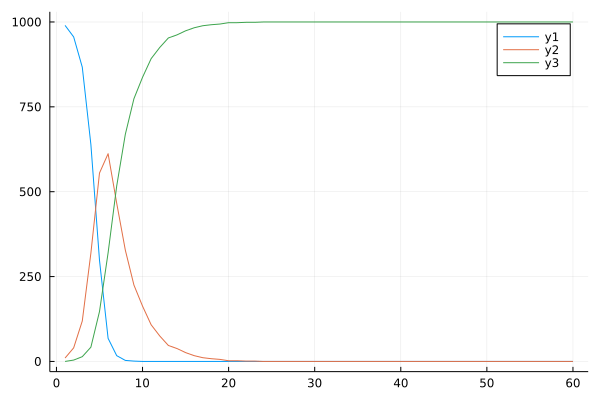

In [71]:
plot(suscetiveis)
plot!(infectados)
plot!(recuperados)



## Referências

- [M. J. Keeling & P. Rohani (2007), Modeling Infectious Diseases in Humans and Animals, Princeton University Press.](https://press.princeton.edu/books/hardcover/9780691116174/modeling-infectious-diseases-in-humans-and-animals)